# Load the results of Spike Inference.

In [4]:
# --- Phase 3: Tuning Function Fitting ---
# Goal: Load the outputs from the previous notebooks (00 & 02) and use them 
# to estimate the receptive field (RF) for each neuron.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils as U 
import importlib
import os
import glob

# Reload utils to ensure you're using the latest version of your functions
importlib.reload(U) 

print("Starting Phase 3: Tuning Function Fitting...")

# --- Step 1: Load Inputs from Saved Files ---

try:
    # ACTION: Change 'aakarsh' to your namespace if needed.
    namespace = "aakarsh" 
    
    # --- Load the latest output from the preprocessing notebook (00-background.ipynb) ---
    background_dir = f'data/{namespace}/background/'
    list_of_background_files = glob.glob(os.path.join(background_dir, '*.npz'))
    if not list_of_background_files:
        raise FileNotFoundError(f"No background data files found in '{background_dir}'")
    
    latest_background_file = max(list_of_background_files, key=os.path.getctime)
    print(f"Loading latest background data from: {latest_background_file}")
    
    stim_data = np.load(latest_background_file, allow_pickle=True)
    stim_filtered = stim_data['stim_filtered']
    stim_table_filtered_df = pd.DataFrame(stim_data['stim_table_filtered'], columns=stim_data['stim_table_columns'])
    

    # --- Load the latest output from the spike inference notebook (02-spike-inference.ipynb) ---
    spike_inference_dir = f'data/{namespace}/preprocessed/'
    list_of_spike_files = glob.glob(os.path.join(spike_inference_dir, '*.npz'))
    if not list_of_spike_files:
        raise FileNotFoundError(f"No spike inference files found in '{spike_inference_dir}'")
    
    latest_spike_file = max(list_of_spike_files, key=os.path.getctime)
    print(f"Loading latest spike inference data from: {latest_spike_file}")
    
    spike_data = np.load(latest_spike_file, allow_pickle=True)
    print(spike_data.keys())

    inferred_spikes = spike_data['spike_counts']
    time_vector = spike_data['time_vector']
    sampling_rate = spike_data['sampling_frequency']
    

except FileNotFoundError as e:
    print(f"ERROR: Could not find a necessary input file: {e}")
    print("Please ensure you have run the previous notebooks (00 and 02) and saved their outputs correctly.")
    raise

Starting Phase 3: Tuning Function Fitting...
Loading latest background data from: data/aakarsh/background/cleaned_2025_07_16_17_35_52.npz
Loading latest spike inference data from: data/aakarsh/preprocessed/oasis_preprocessed_recordings_2025_07_18_10_16_01.npz
KeysView(NpzFile 'data/aakarsh/preprocessed/oasis_preprocessed_recordings_2025_07_18_10_16_01.npz' with keys: processed_neuron_signal, spike_counts, thresholds, sampling_frequency, time_vector)


In [ ]:
import numpy as np
import pandas as pd

# Isolate the stimulus start times in seconds
start_times_s = stim_table_filtered_df["start_s"].values

# Step 2: Calculate the time difference between consecutive frames
frame_durations = np.diff(start_times_s)

# Get the average duration
avg_frame_duration_s = np.mean(frame_durations)
median_frame_duration_s = np.median(frame_durations)
# Step 3: Calculate the frame rate in Hertz (Hz)
frame_rate_hz = 1 / avg_frame_duration_s

print(f"Average Frame Duration: {avg_frame_duration_s * 1000:.2f} ms")
print(f"Median Frame Duration: {median_frame_duration_s * 1000:.2f} ms")
print(f"Stimulus Frame Rate: {frame_rate_hz:.2f} Hz")

Average Frame Duration: 12.46 ms
Median Frame Duration: 8.00 ms
Stimulus Frame Rate: 80.28 Hz


In [18]:
from utils import load_data


data  = load_data()# Load the latest spike inference data

In [24]:
data['t'].shape

(105968,)

In [ ]:
# Time stamps for calculating recording indicate sampling frequency. 
compute_sampling_frequency = 1 / (data['t'][1] - data['t'][0])  # Assuming uniform sampling
print(f"Computed Sampling Frequency: {compute_sampling_frequency:.2f} Hz")

Computed Sampling Frequency: 30.15 Hz


In [26]:
# Median frame duration for which a stimulu was presented
frame_durations = np.diff(stim_table_filtered_df["start_s"].values)
avg_frame_duration_s = np.mean(frame_durations)
median_frame_duration_s = np.median(frame_durations)
print(f"Average Frame Duration: {avg_frame_duration_s * 1000:.2f} ms")
print(f"Median Frame Duration: {median_frame_duration_s * 1000:.2f} ms")
print(f"Stimulus Frame Rate: {frame_rate_hz:.2f} Hz")

Average Frame Duration: 12.46 ms
Median Frame Duration: 8.00 ms
Stimulus Frame Rate: 80.28 Hz


In [23]:
data['dff'].shape

(189, 105968)

In [16]:
len(stim_table_filtered_df)

7739

In [7]:
print(f"stim_data['t_filtered'].shape: {stim_data['t_filtered'].shape}")
print(f"stim_data['dff_filtered'].shape: {stim_data['dff_filtered'].shape}")
print(f"stim_data['running_seed_filtered'].shape: {stim_data['running_speed_filtered'].shape}")
print(f"stim_data['stim_filtered'].shape: {stim_data['stim_filtered'].shape}")
print(f"stim_data['stim_table_table_filtered'].shape: {stim_data['stim_table_filtered'].shape}")
print(f"stim_table_columns.shape: {stim_data['stim_table_columns'].shape}")


stim_data['t_filtered'].shape: (1760,)
stim_data['dff_filtered'].shape: (189, 1760)
stim_data['running_seed_filtered'].shape: (2, 1760)
stim_data['stim_filtered'].shape: (7739, 16, 28)
stim_data['stim_table_table_filtered'].shape: (7739, 5)
stim_table_columns.shape: (5,)


array([[[127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        ...,
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127]],

       [[127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        ...,
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127]],

       [[127, 127, 127, ..., 127, 127, 127],
        [255, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        ...,
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [255, 127, 127, ..., 127, 127, 127]],

       ...,

       [[127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127

Step 1: Binning inferred spikes...
Binned spikes shape: (189, 7739)

Step 2: Preparing stimulus matrix...
Flattened stimulus shape: (448, 7739)

Step 3 & 4: Fitting spatio-temporal receptive fields for all neurons...
  Fitting Neuron 1/189...


/Users/aakarsh/src/TUE-SUMMER-2025/nds-final-project-summer25/utils.py:420: RuntimeWarning: overflow encountered in exp
  rates = np.exp(lin) * dt * R
/Users/aakarsh/src/TUE-SUMMER-2025/nds-final-project-summer25/utils.py:429: RuntimeWarning: overflow encountered in exp
  rates = np.exp(lin) * dt * R
/Users/aakarsh/src/TUE-SUMMER-2025/nds-final-project-summer25/utils.py:431: RuntimeWarning: invalid value encountered in matmul
  grad = s @ (rates - c)


  Fitting Neuron 2/189...
  Fitting Neuron 3/189...
  Fitting Neuron 4/189...
  Fitting Neuron 5/189...
  Fitting Neuron 6/189...
  Fitting Neuron 7/189...
  Fitting Neuron 8/189...
  Fitting Neuron 9/189...
  Fitting Neuron 10/189...
  Fitting Neuron 11/189...
  Fitting Neuron 12/189...
  Fitting Neuron 13/189...
  Fitting Neuron 14/189...
  Fitting Neuron 15/189...
  Fitting Neuron 16/189...
  Fitting Neuron 17/189...
  Fitting Neuron 18/189...
  Fitting Neuron 19/189...
  Fitting Neuron 20/189...
  Fitting Neuron 21/189...
  Fitting Neuron 22/189...
  Fitting Neuron 23/189...
  Fitting Neuron 24/189...
  Fitting Neuron 25/189...
  Fitting Neuron 26/189...
  Fitting Neuron 27/189...
  Fitting Neuron 28/189...
  Fitting Neuron 29/189...
  Fitting Neuron 30/189...
  Fitting Neuron 31/189...
  Fitting Neuron 32/189...
  Fitting Neuron 33/189...
  Fitting Neuron 34/189...
  Fitting Neuron 35/189...
  Fitting Neuron 36/189...
  Fitting Neuron 37/189...
  Fitting Neuron 38/189...
  Fitting

/Users/aakarsh/src/TUE-SUMMER-2025/nds-final-project-summer25/utils.py:431: RuntimeWarning: overflow encountered in matmul
  grad = s @ (rates - c)


  Fitting Neuron 58/189...
  Fitting Neuron 59/189...
  Fitting Neuron 59/189...
  Fitting Neuron 60/189...
  Fitting Neuron 60/189...
  Fitting Neuron 61/189...
  Fitting Neuron 61/189...
  Fitting Neuron 62/189...
  Fitting Neuron 62/189...
  Fitting Neuron 63/189...
  Fitting Neuron 63/189...
  Fitting Neuron 64/189...
  Fitting Neuron 64/189...
  Fitting Neuron 65/189...
  Fitting Neuron 65/189...
  Fitting Neuron 66/189...
  Fitting Neuron 66/189...
  Fitting Neuron 67/189...
  Fitting Neuron 67/189...
  Fitting Neuron 68/189...
  Fitting Neuron 68/189...
  Fitting Neuron 69/189...
  Fitting Neuron 69/189...
  Fitting Neuron 70/189...
  Fitting Neuron 70/189...
  Fitting Neuron 71/189...
  Fitting Neuron 71/189...
  Fitting Neuron 72/189...
  Fitting Neuron 72/189...
  Fitting Neuron 73/189...
  Fitting Neuron 73/189...
  Fitting Neuron 74/189...
  Fitting Neuron 74/189...
  Fitting Neuron 75/189...
  Fitting Neuron 75/189...
  Fitting Neuron 76/189...
  Fitting Neuron 76/189...
 

/Users/aakarsh/opt/anaconda3/envs/tue-summer-2025-oasis/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


  Fitting Neuron 128/189...
  Fitting Neuron 129/189...
  Fitting Neuron 130/189...
  Fitting Neuron 131/189...
  Fitting Neuron 132/189...
  Fitting Neuron 133/189...
  Fitting Neuron 134/189...
  Fitting Neuron 135/189...
  Fitting Neuron 136/189...
  Fitting Neuron 137/189...
  Fitting Neuron 138/189...
  Fitting Neuron 139/189...
  Fitting Neuron 140/189...
  Fitting Neuron 141/189...
  Fitting Neuron 142/189...
  Fitting Neuron 143/189...
  Fitting Neuron 144/189...
  Fitting Neuron 145/189...
  Fitting Neuron 146/189...
  Fitting Neuron 147/189...
  Fitting Neuron 148/189...
  Fitting Neuron 149/189...
  Fitting Neuron 150/189...
  Fitting Neuron 151/189...
  Fitting Neuron 152/189...
  Fitting Neuron 153/189...
  Fitting Neuron 154/189...
  Fitting Neuron 155/189...
  Fitting Neuron 156/189...
  Fitting Neuron 157/189...
  Fitting Neuron 158/189...
  Fitting Neuron 159/189...
  Fitting Neuron 160/189...
  Fitting Neuron 161/189...
  Fitting Neuron 162/189...
  Fitting Neuron 163

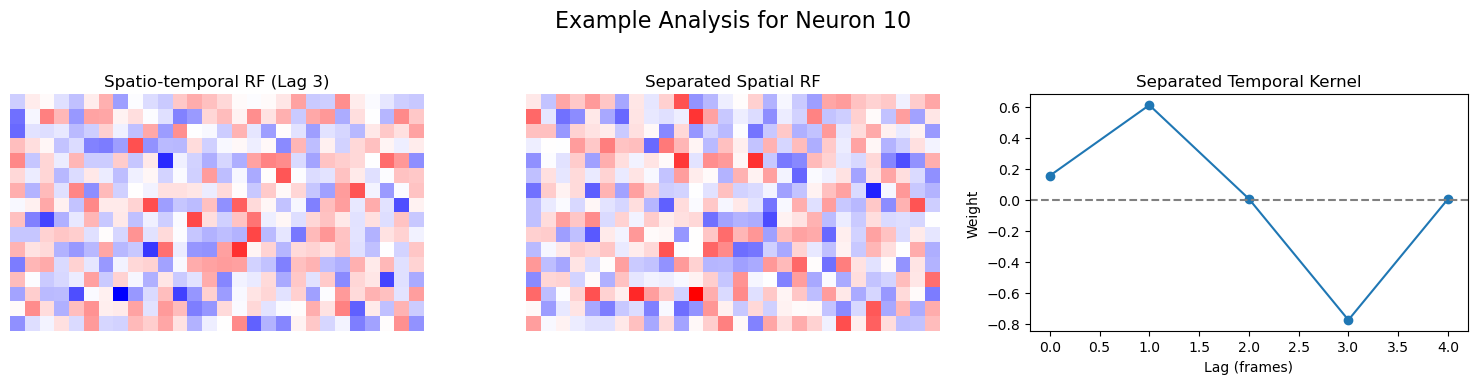

In [7]:
# --- Step 2: Run the Receptive Field Fitting Pipeline ---

# 2a. Bin the inferred spikes to align them with the stimulus frames
binned_spikes = U.bin_spikes_to_frames(inferred_spikes, t_filtered, stim_table_filtered_df)

# 2b. Prepare the stimulus matrix by flattening the frames
flattened_stim, stim_h, stim_w = U.prepare_stimulus_matrix(stim_filtered)

# 2c. Define the time lags and fit the STRF for all neurons
lags_to_test = [0, 1, 2, 3, 4] # Using 5 lags as in your CodingLab5
all_rfs_spatiotemporal = U.fit_all_neurons_rfs(binned_spikes, flattened_stim, lags_to_test)

# 2d. Extract the primary spatial component from each STRF using SVD
all_rfs_spatial = U.extract_spatial_rfs_svd(all_rfs_spatiotemporal, stim_h, stim_w)

print("\nReceptive field fitting and analysis complete!")



Visualizing results for an example neuron (Neuron 110)...


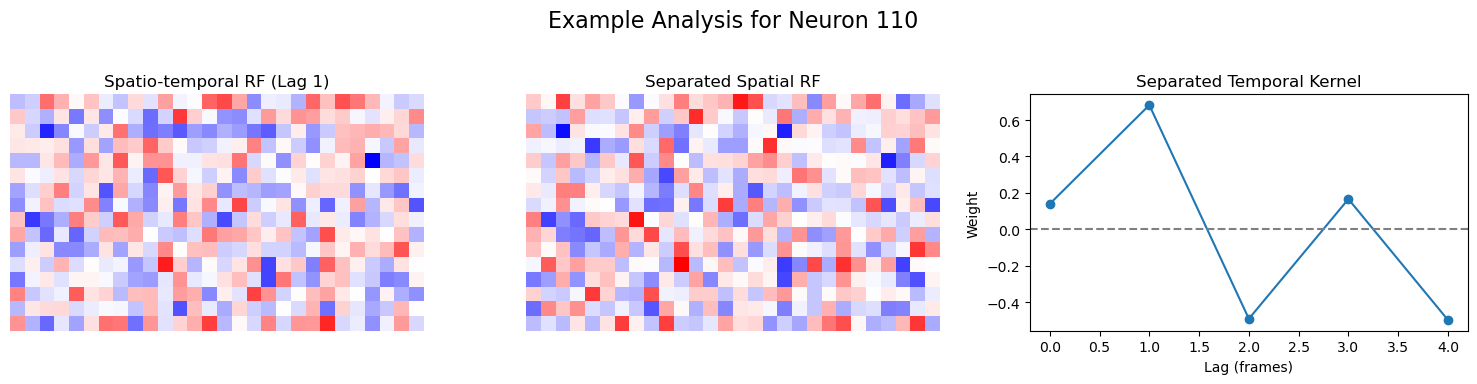


Visualizing results for an example neuron (Neuron 153)...


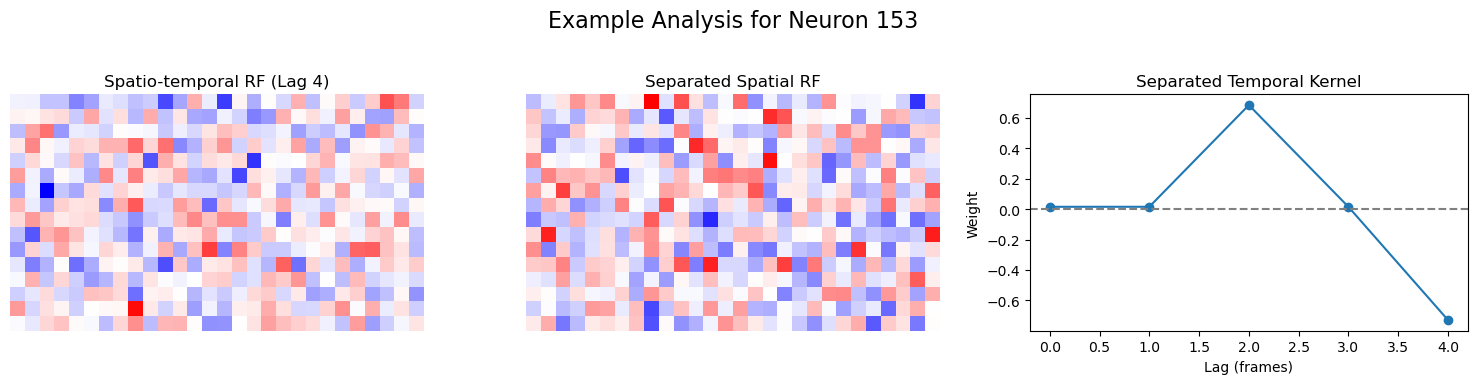


Visualizing results for an example neuron (Neuron 49)...


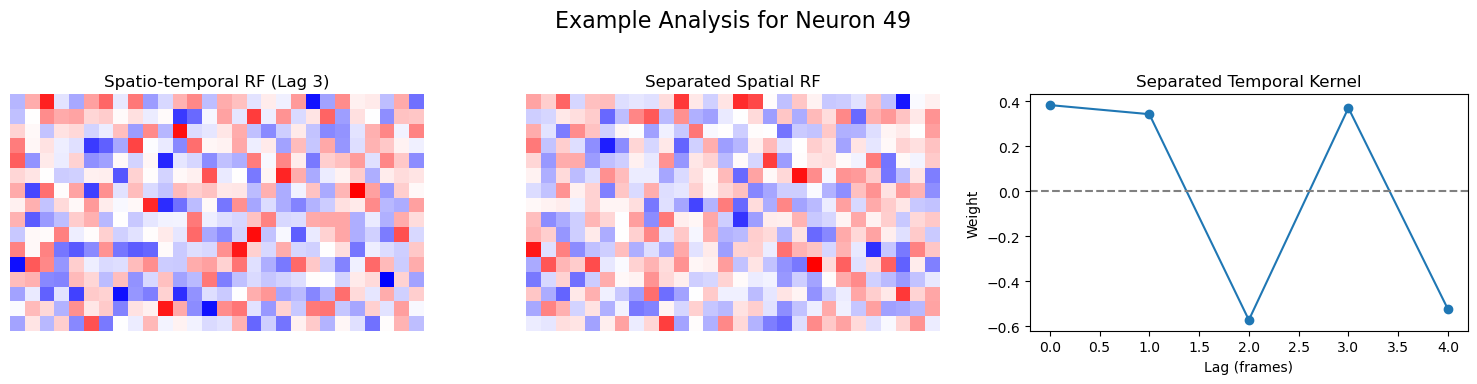


Visualizing results for an example neuron (Neuron 1)...


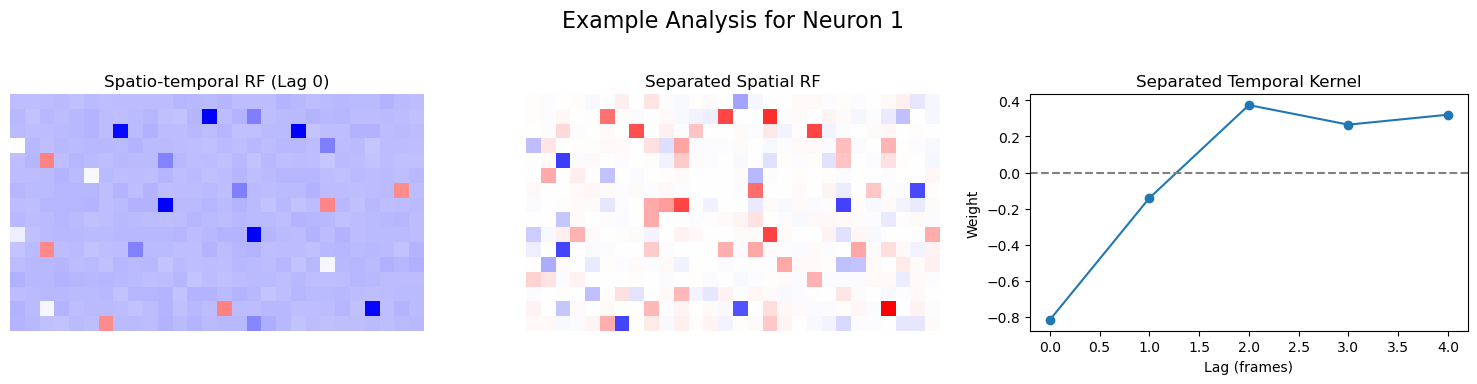


Visualizing results for an example neuron (Neuron 113)...


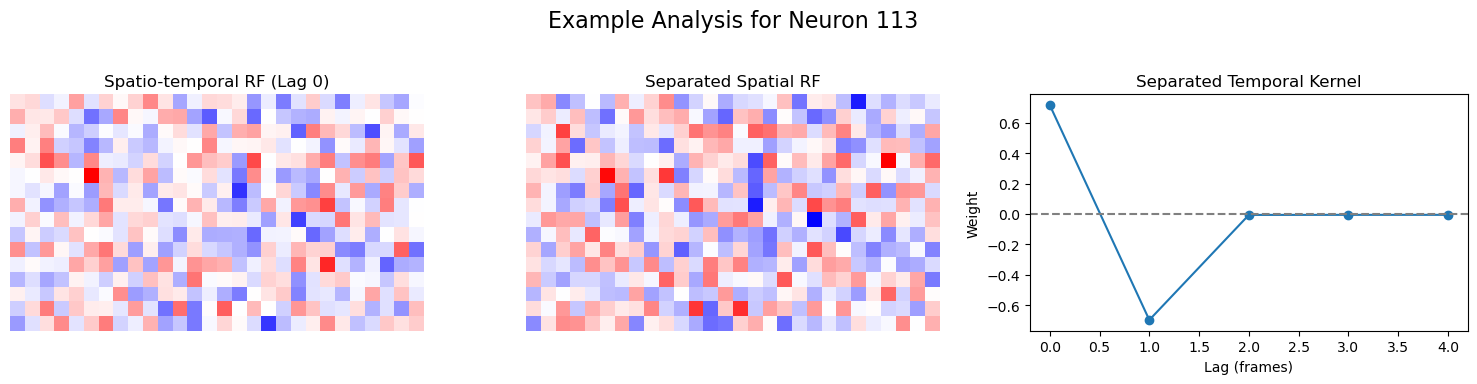


Visualizing results for an example neuron (Neuron 82)...


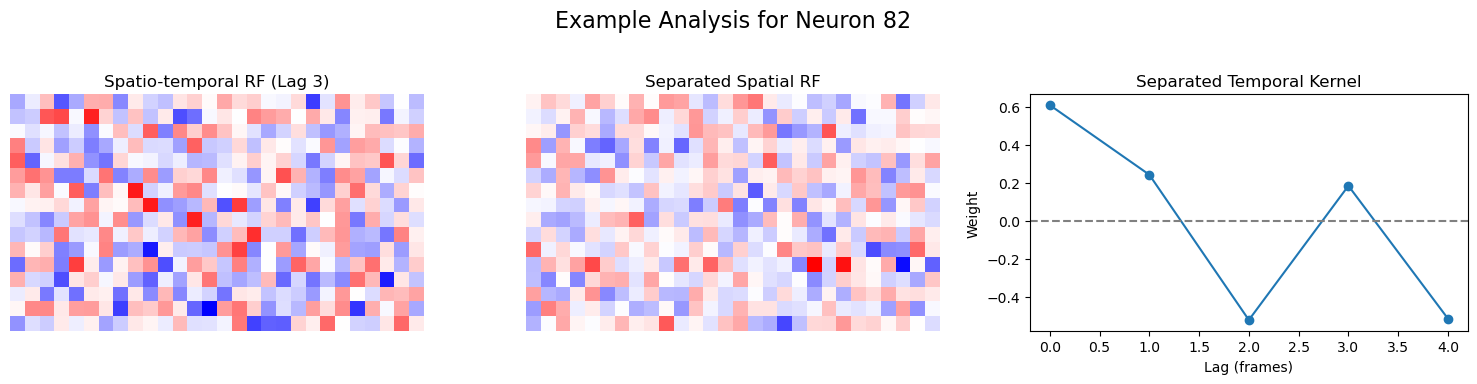


Visualizing results for an example neuron (Neuron 148)...


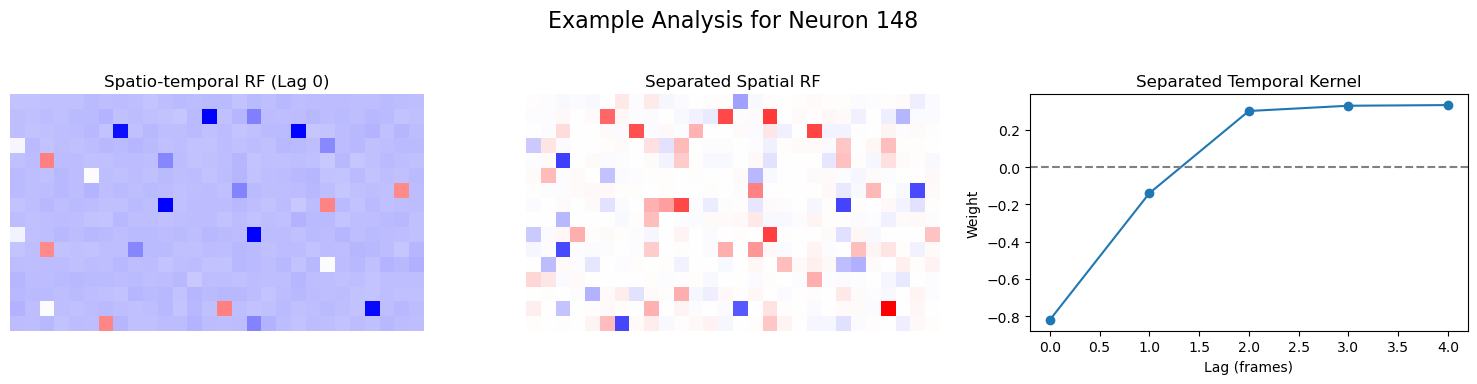


Visualizing results for an example neuron (Neuron 141)...


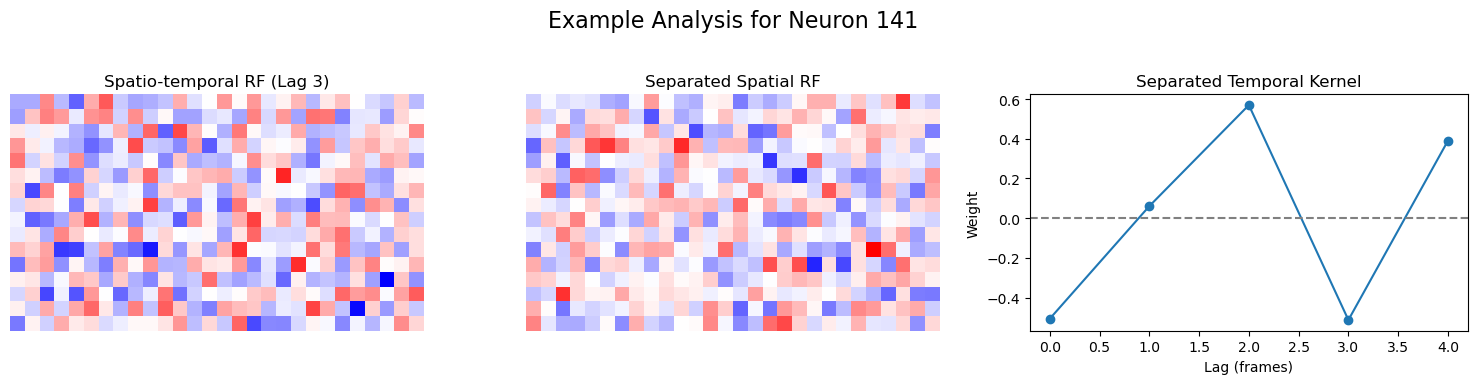


Visualizing results for an example neuron (Neuron 149)...


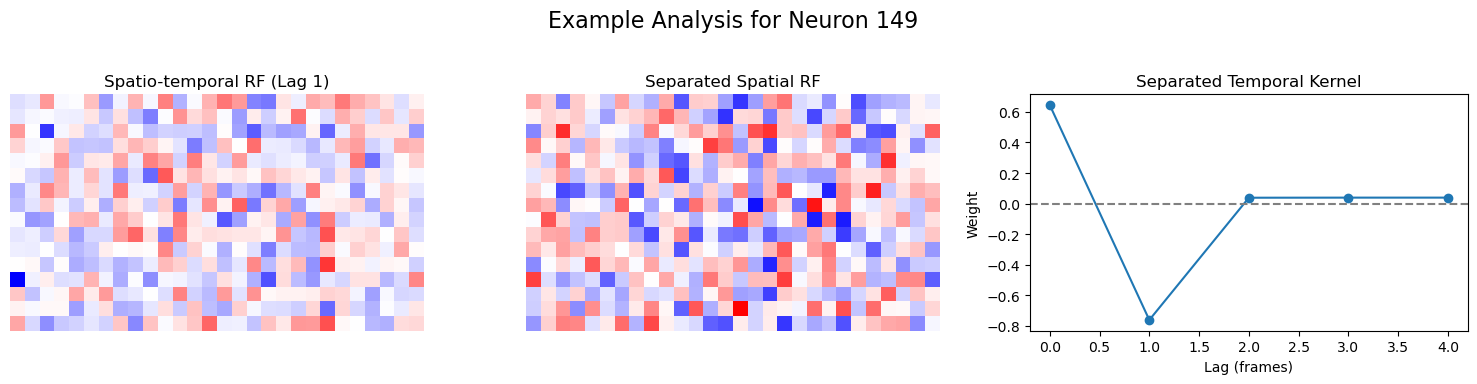


Visualizing results for an example neuron (Neuron 176)...


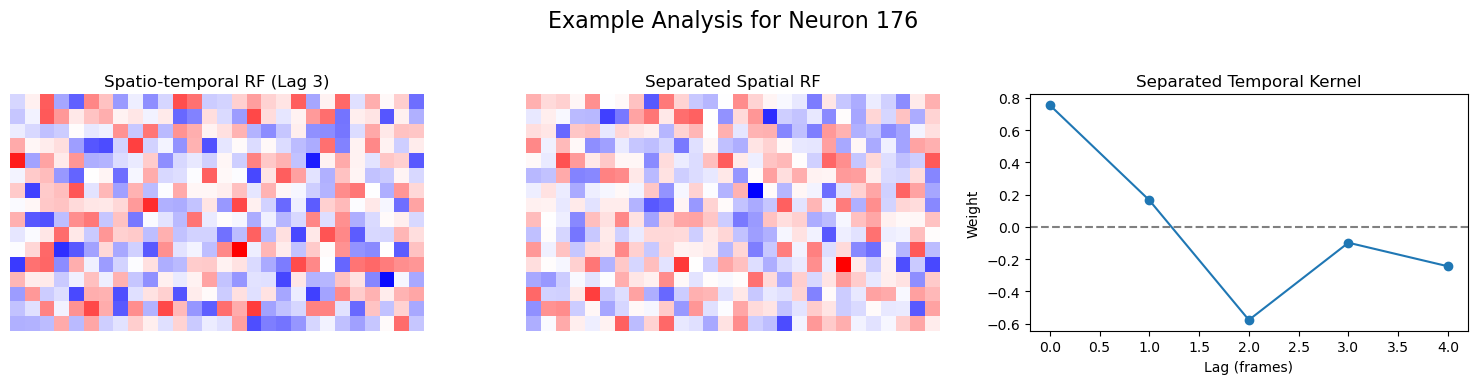


Visualizing results for an example neuron (Neuron 108)...


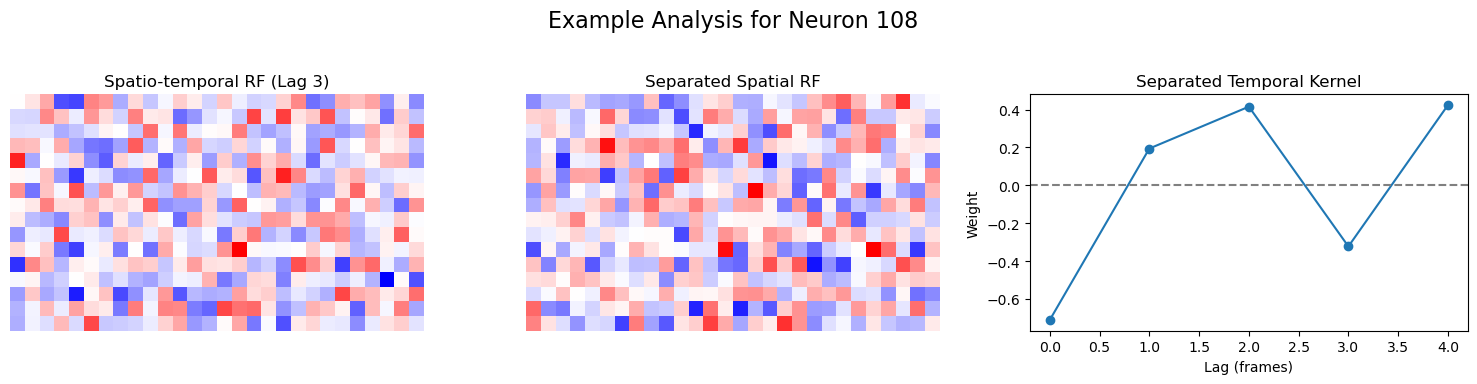


Visualizing results for an example neuron (Neuron 121)...


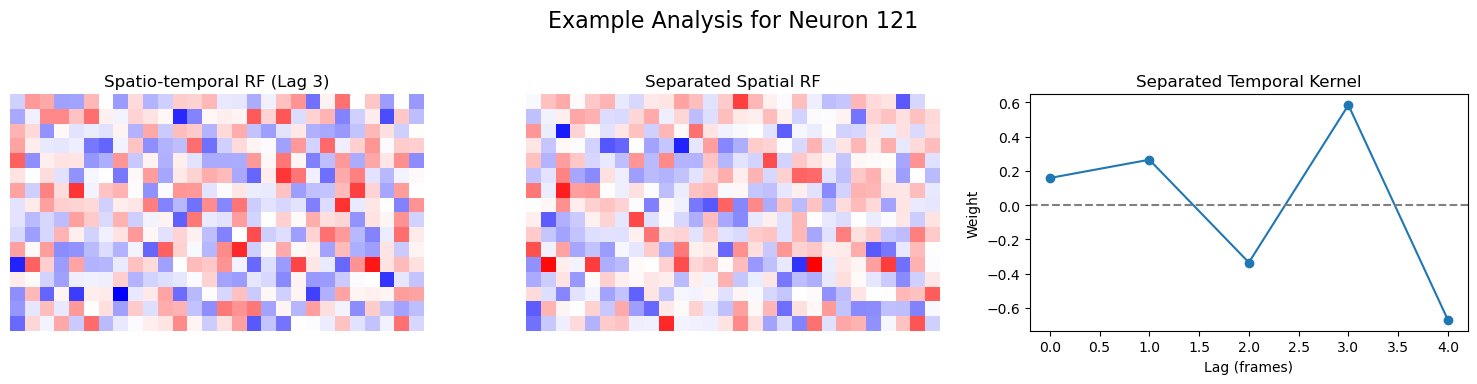


Visualizing results for an example neuron (Neuron 90)...


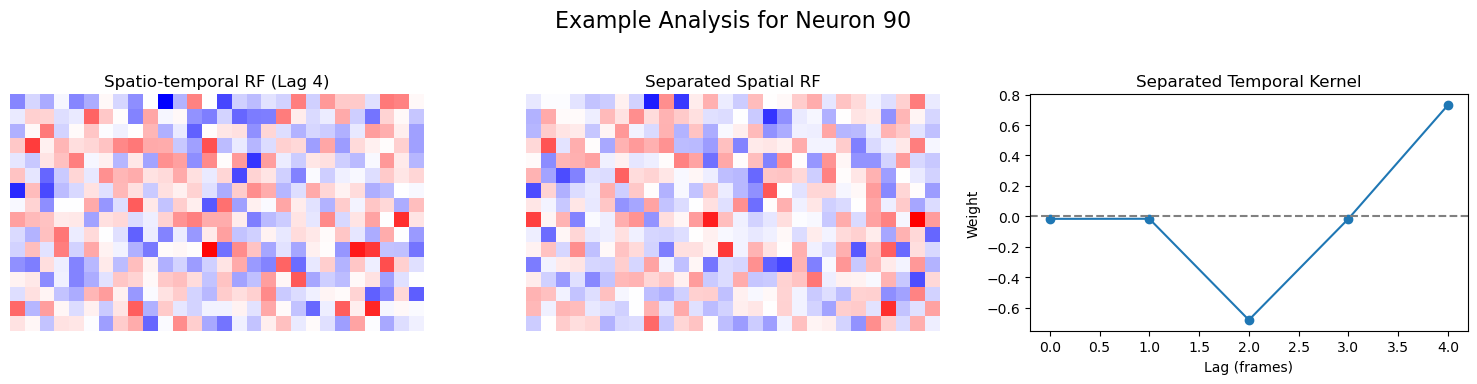


Visualizing results for an example neuron (Neuron 32)...


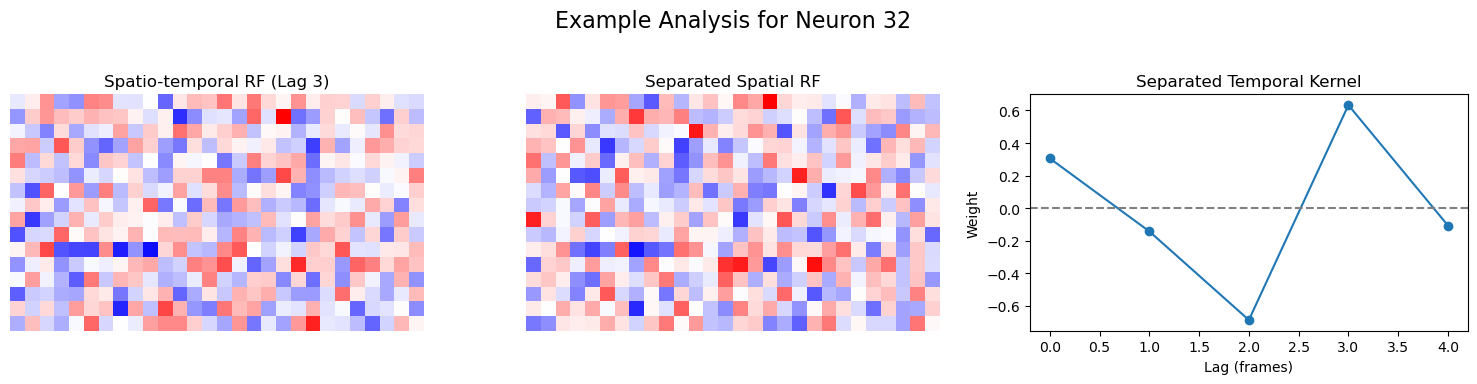


Visualizing results for an example neuron (Neuron 137)...


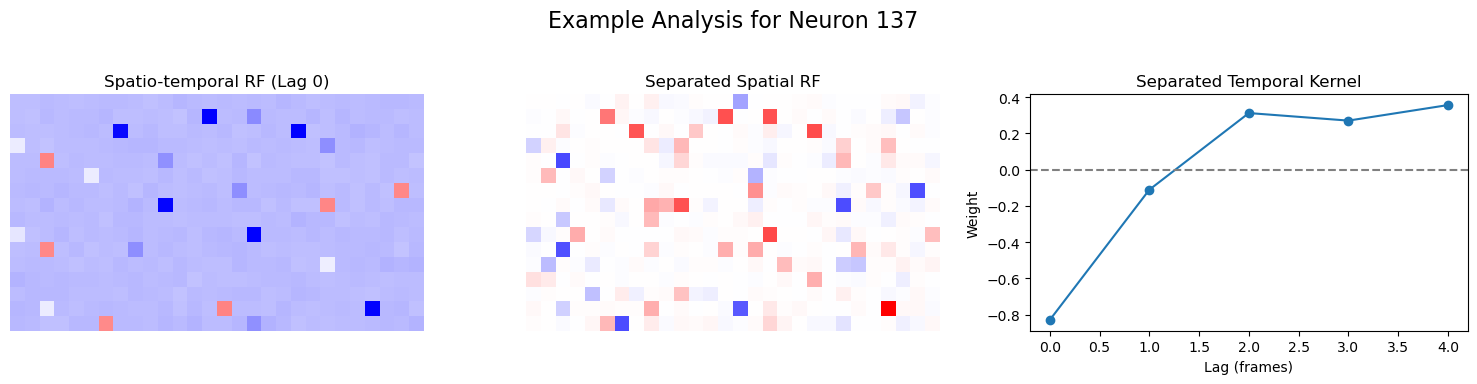


Visualizing results for an example neuron (Neuron 83)...


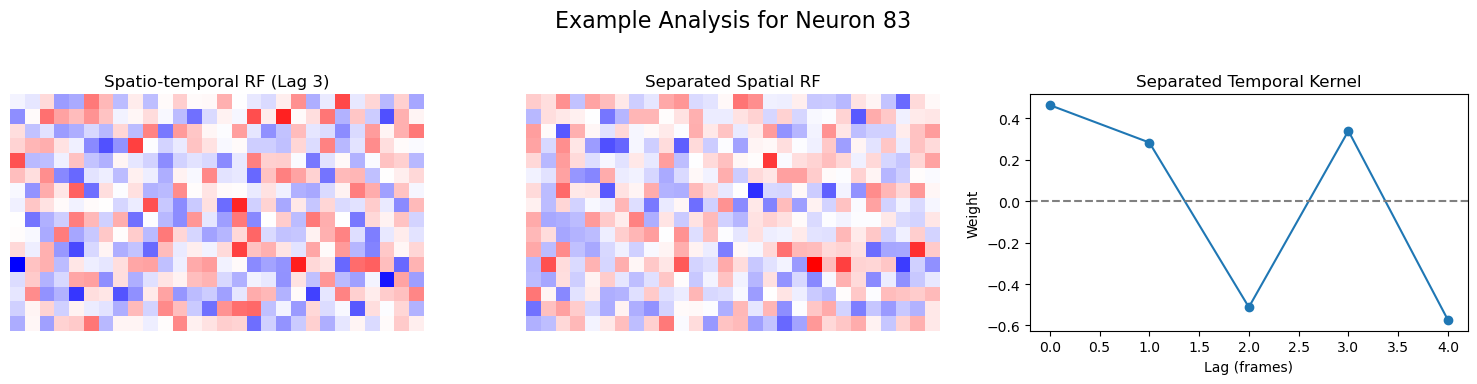


Visualizing results for an example neuron (Neuron 22)...


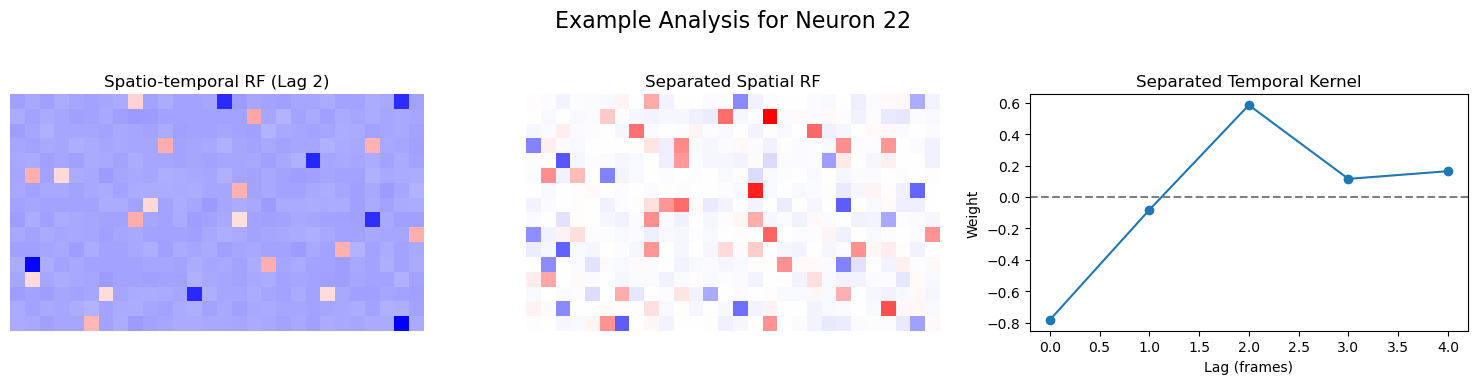


Visualizing results for an example neuron (Neuron 17)...


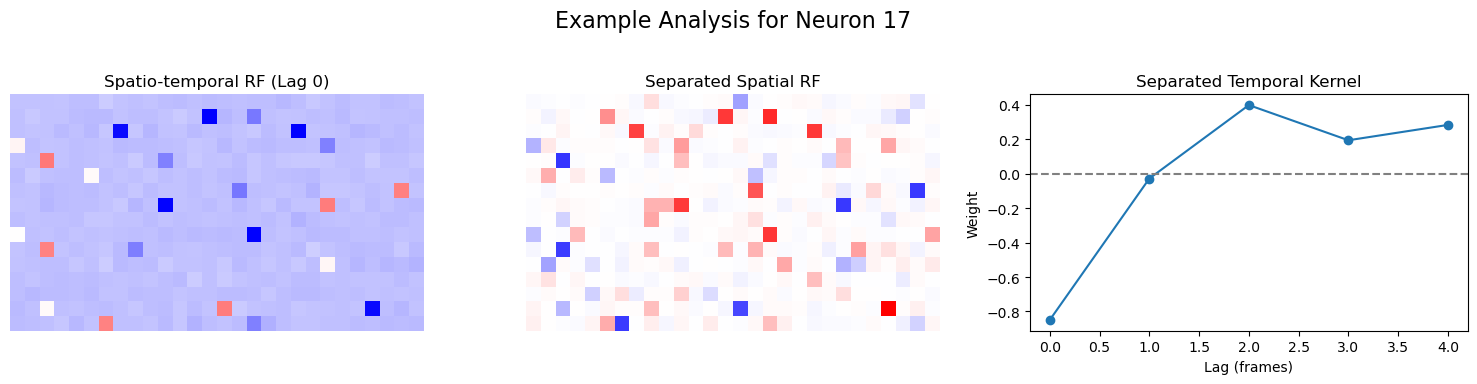


Visualizing results for an example neuron (Neuron 34)...


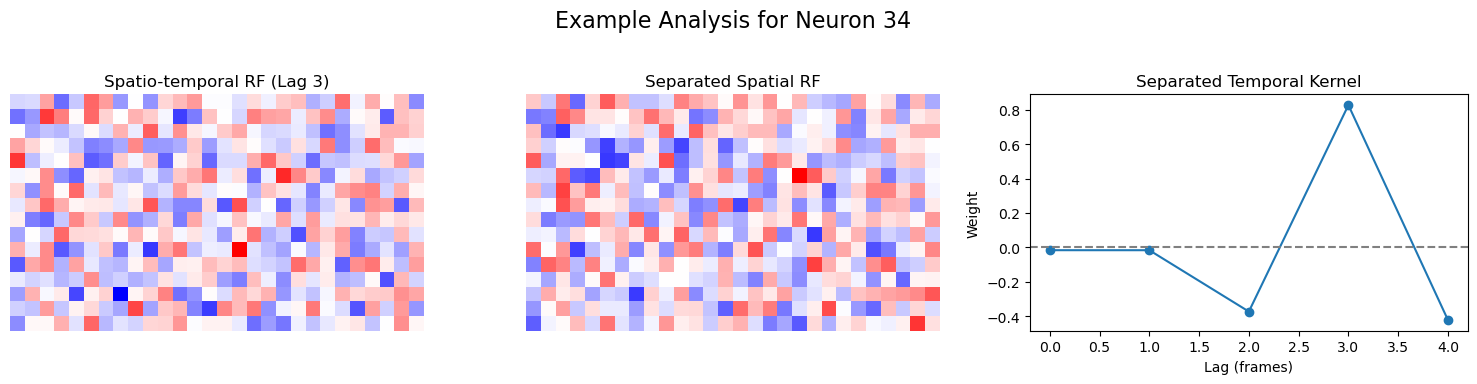


Visualizing results for an example neuron (Neuron 52)...


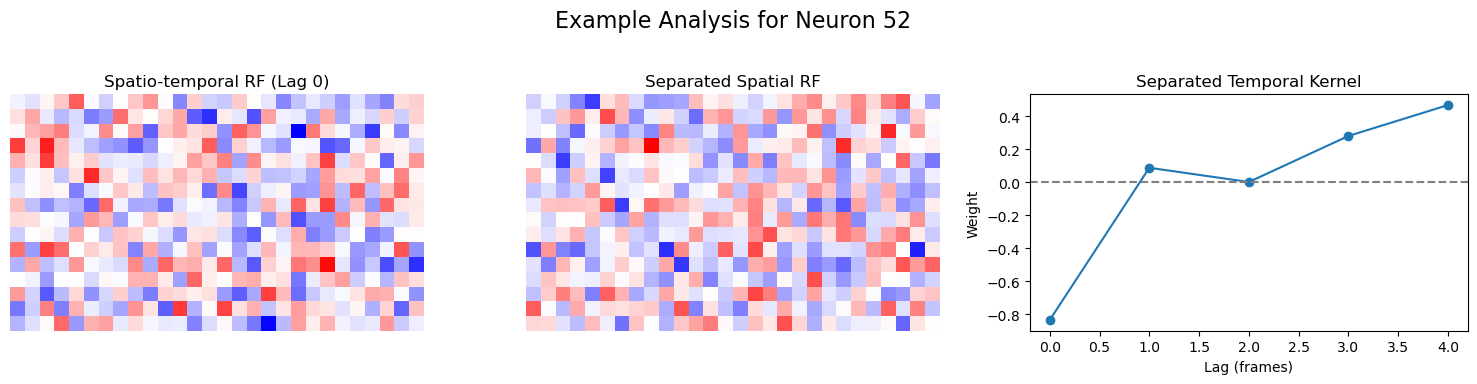


Visualizing results for an example neuron (Neuron 119)...


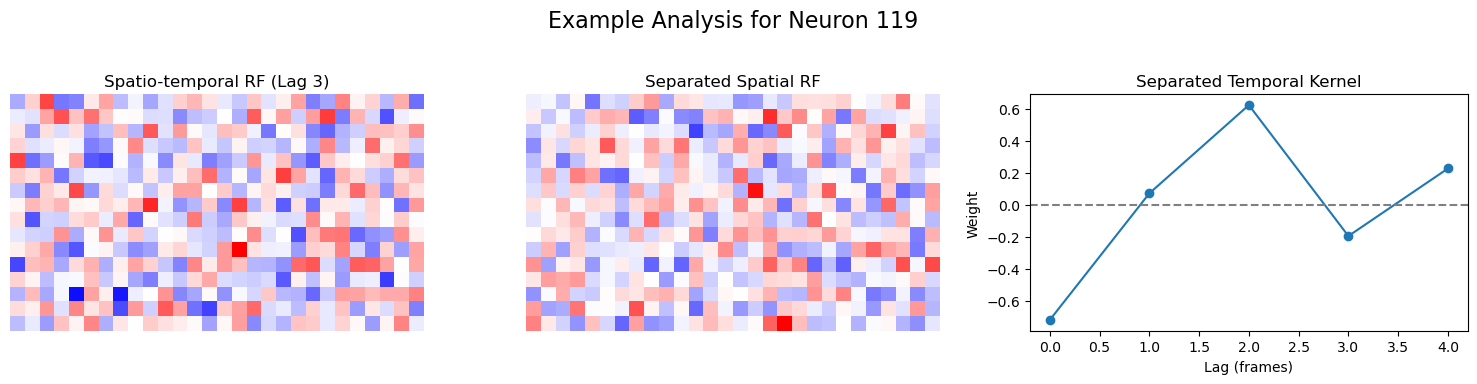


Visualizing results for an example neuron (Neuron 167)...


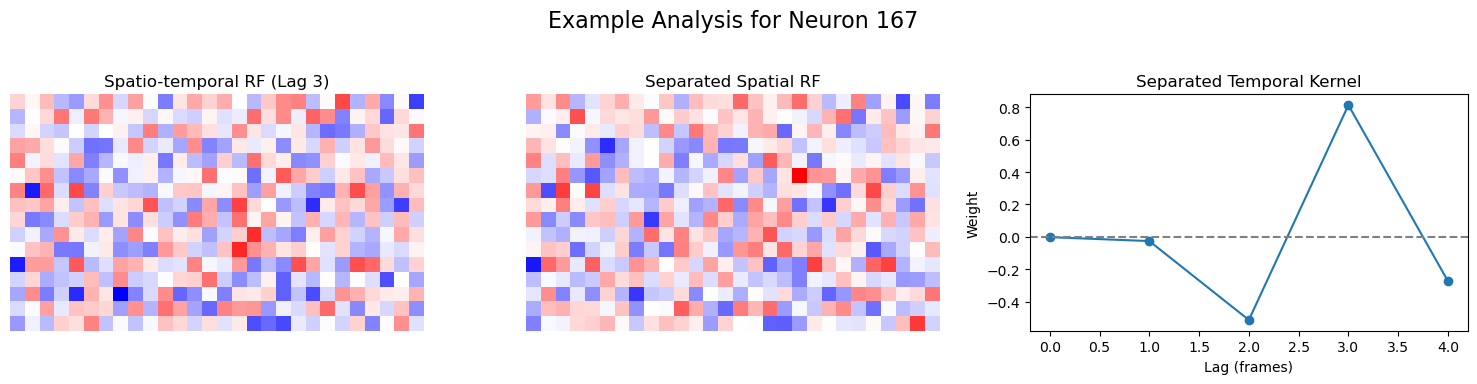


Visualizing results for an example neuron (Neuron 2)...


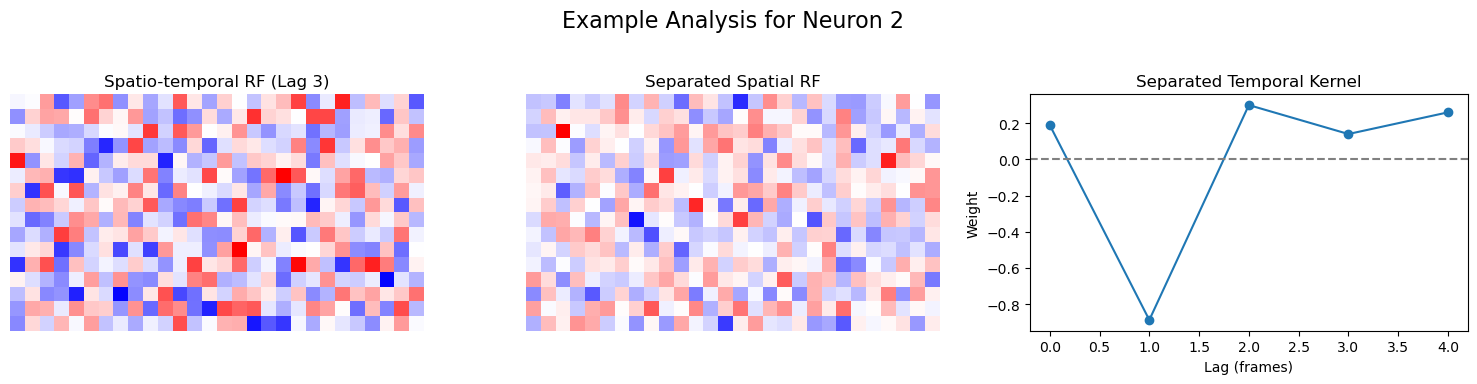


Visualizing results for an example neuron (Neuron 68)...


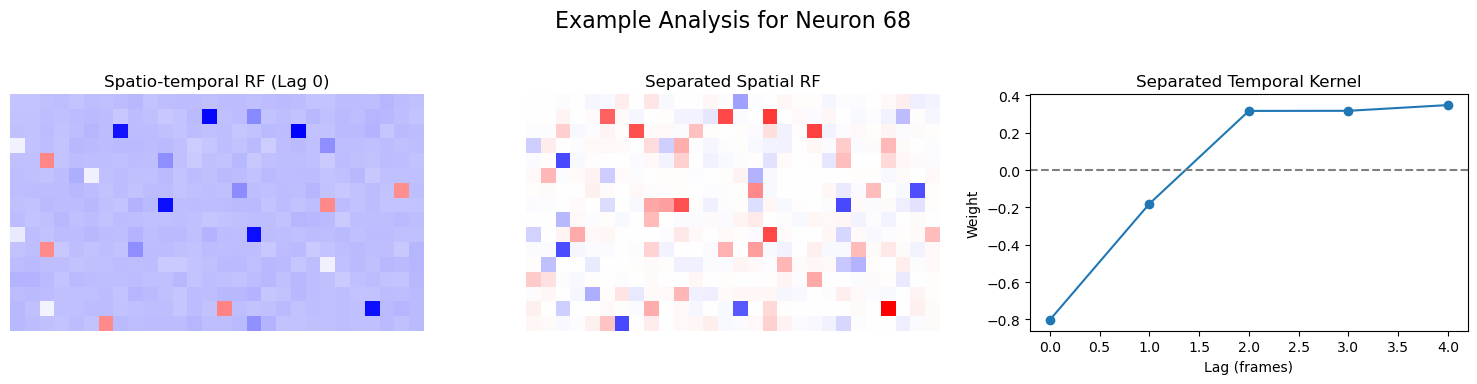


Visualizing results for an example neuron (Neuron 60)...


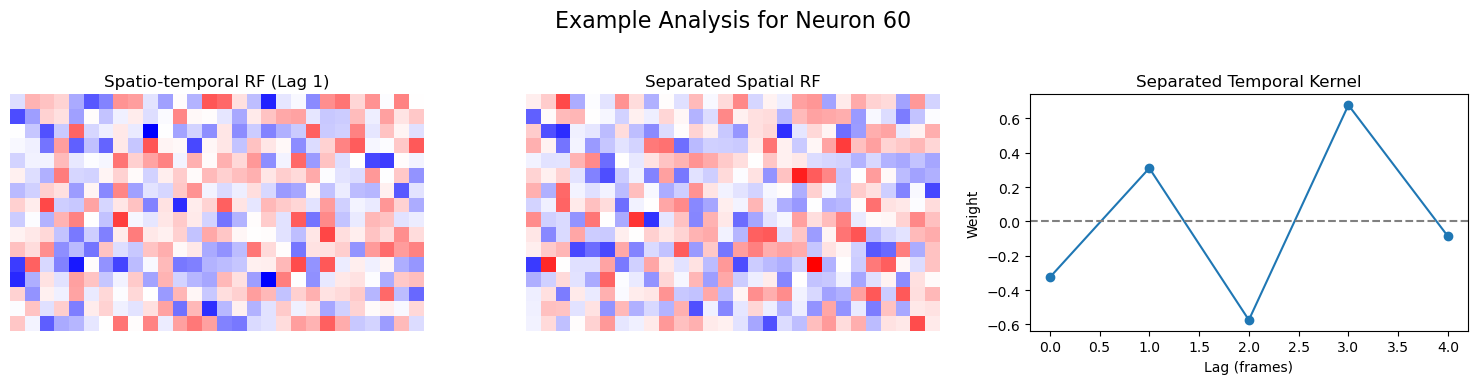

In [14]:
# --- Step 3: Verification Plot ---
# Check 5 random neurons to verify the RF fitting
num_neurons_to_check = 25
neurons_to_check = np.random.choice(range(len(all_rfs_spatiotemporal)), num_neurons_to_check, replace=False)
for neuron_id in neurons_to_check:
    U.visualize_neuron_rf(
        neuron_id=neuron_id,
        spatiotemporal_rf=all_rfs_spatiotemporal[neuron_id],
        spatial_rf=all_rfs_spatial[neuron_id],
        delta=lags_to_test
    )

Extracting temporal kernels for all neurons...
Extraction complete.
Generating population temporal kernel heatmap...


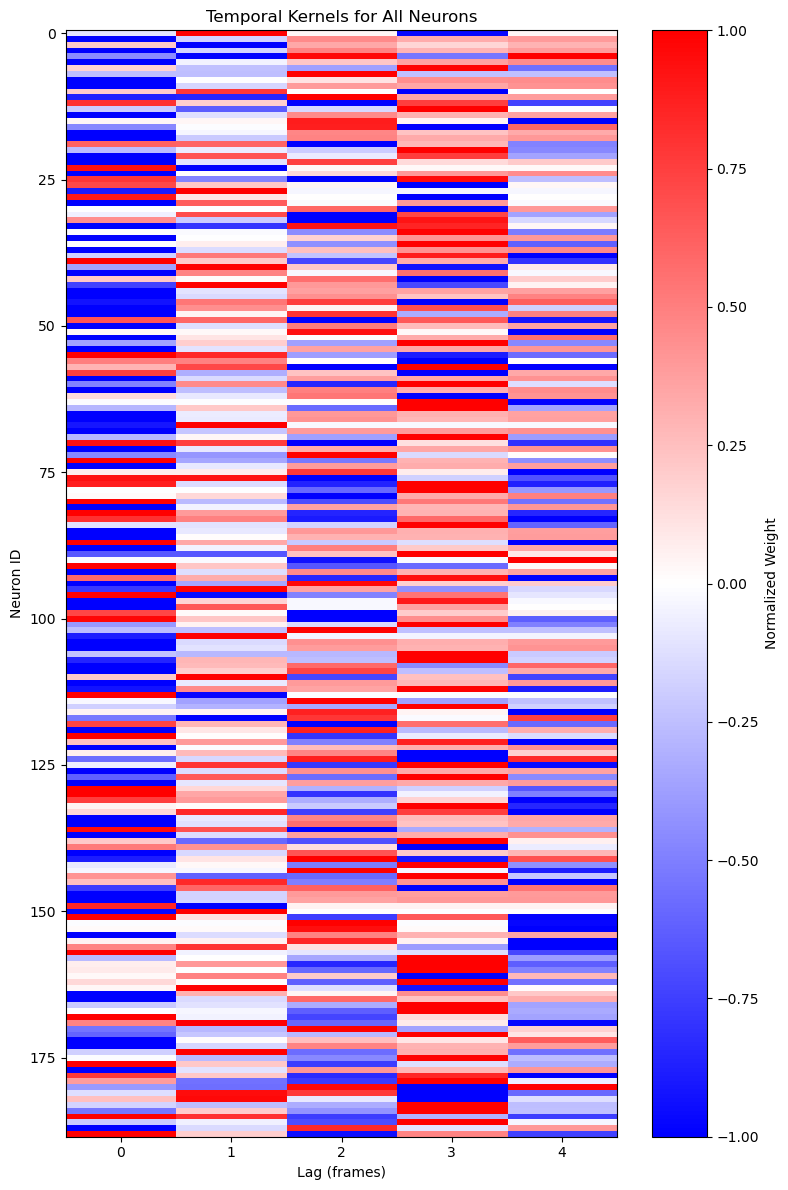

Generating population spatial receptive field contour plot...


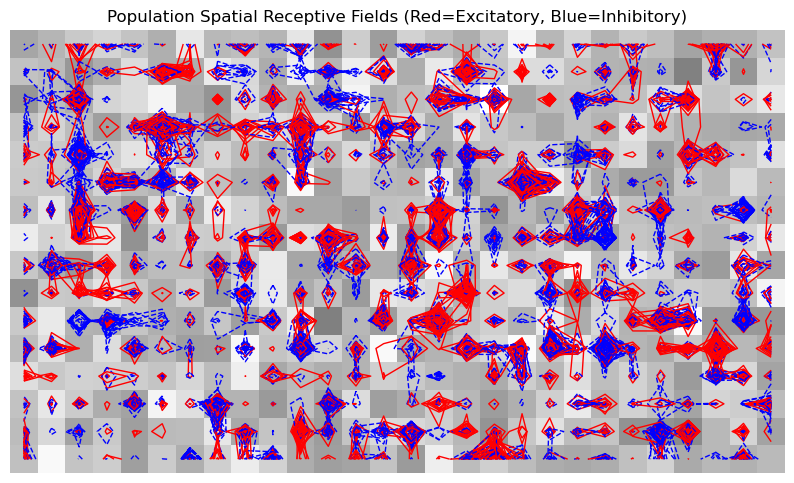


Visualizing the full STRFs for the first 10 neurons...
Generating population spatio-temporal receptive field grid...


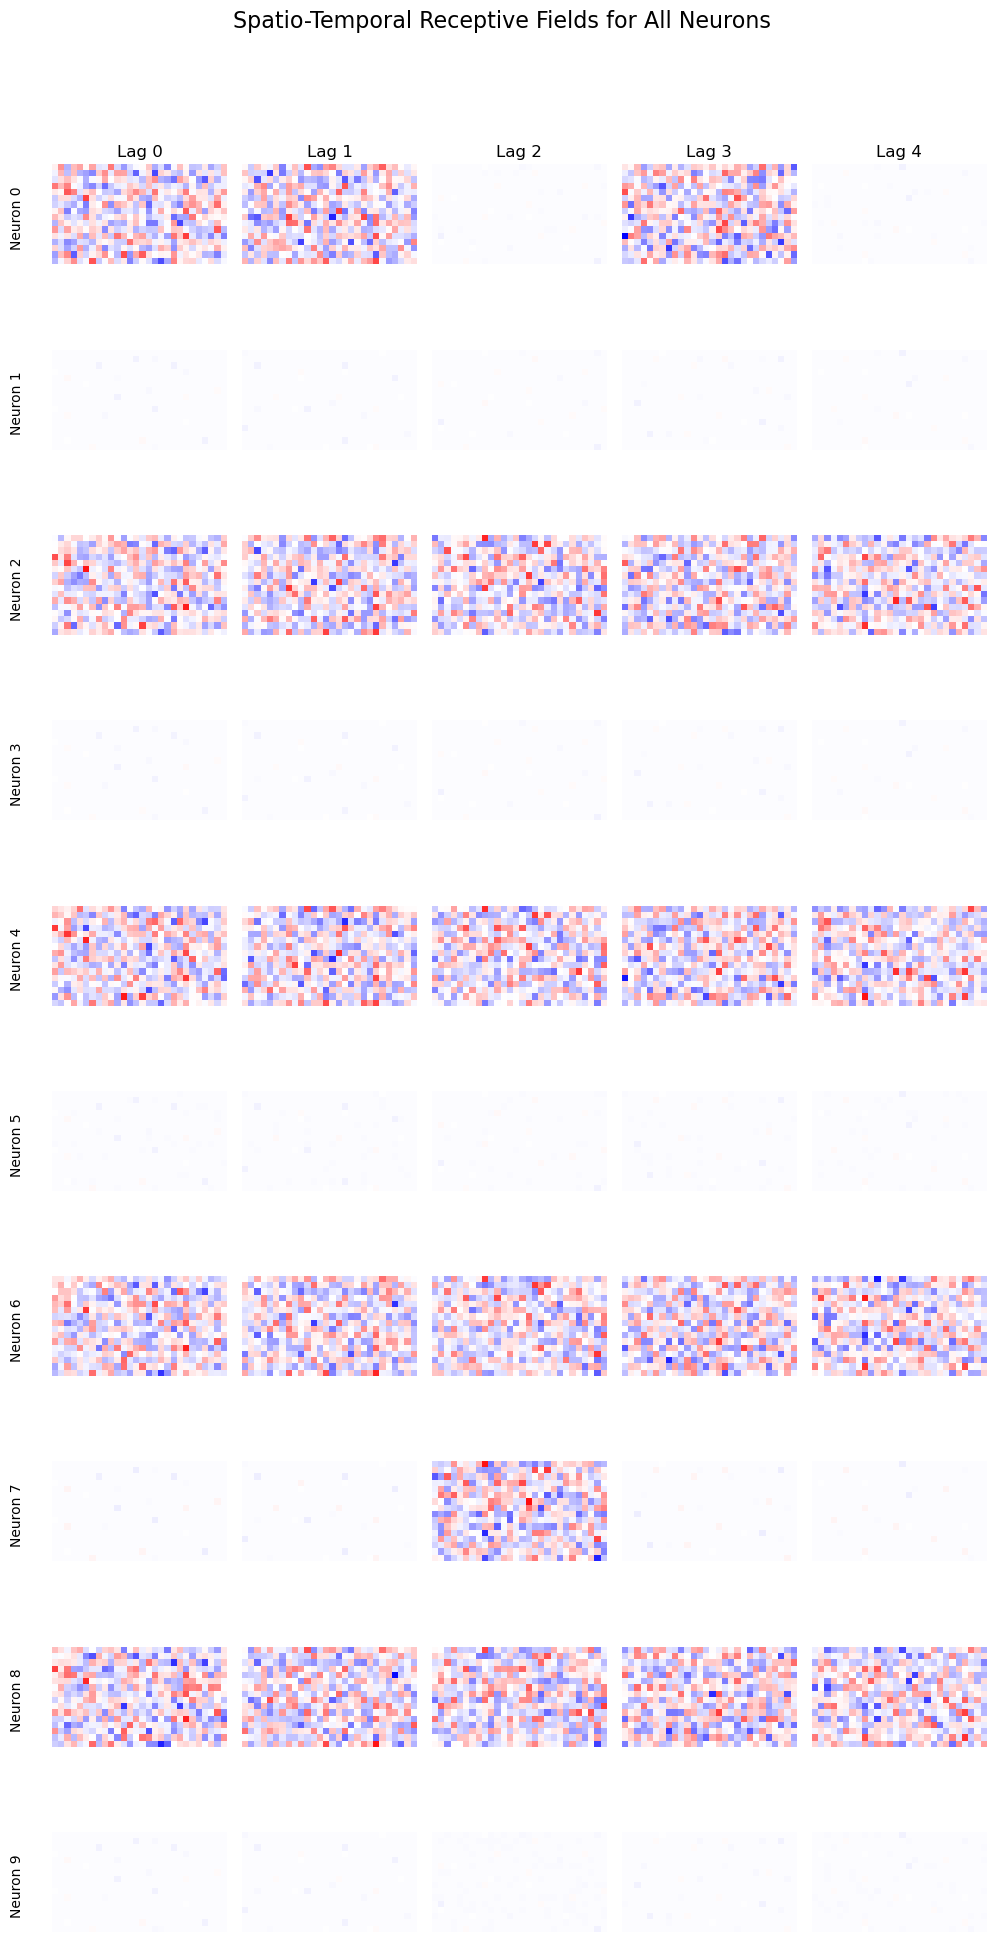

In [15]:
# Add this cell to your practical02.ipynb notebook after fitting the RFs

import importlib
import utils as U
importlib.reload(U) # Reload utils to make sure we have the new functions

# --- Visualizing Population Characteristics ---

# We assume you have the following variables from the previous fitting step:
# all_rfs_spatiotemporal: (list) The list of fitted (pixels, lags) RFs.
# all_rfs_spatial:        (list) The list of separated 2D spatial RFs.
# lags_to_test:           (list) The list of lags used, e.g., [0, 1, 2, 3, 4].
# stim_filtered:          (np.ndarray) The filtered stimulus movie.

# --- Plot 1: Summary of Temporal Dynamics ---
# This heatmap shows the response timing for all neurons at once.
temporal_kernels_population = U.extract_all_temporal_kernels(all_rfs_spatiotemporal)
U.visualize_all_temporal_kernels(temporal_kernels_population, lags_to_test)


# --- Plot 2: Summary of Spatial Tuning ---
# This plot overlays the contours of all spatial RFs to show how they
# cover the visual space.
mean_stimulus_image = stim_filtered.mean(axis=0)
U.visualize_all_spatial_rfs(all_rfs_spatial, background_image=mean_stimulus_image)


# --- Plot 3: Detailed View of Full STRFs ---
# This plot shows the complete spatio-temporal dynamics for a subset of neurons.
# NOTE: Plotting all 189 neurons at once can create a very large and slow figure.
# It's often more practical to look at a subset first.

print("\nVisualizing the full STRFs for the first 10 neurons...")
stim_dims = (stim_filtered.shape[1], stim_filtered.shape[2])
U.visualize_all_strfs(
    all_rfs_spatiotemporal,
    delta=lags_to_test,
    stim_dims=stim_dims,
    neurons_to_plot=range(10) # Plotting the first 10 neurons
)



Starting Phase 4: Final Analysis and Visualization...
Loading latest RF fitting data from: data/aakarsh/rf_fitting/neuron_rf_2025_07_16_20_47_22.npz
Calculating centroids of ROI masks...
ROI centroid calculation complete.
Calculating centers of spatial receptive fields...
RF center calculation complete.

Generating retinotopic maps...


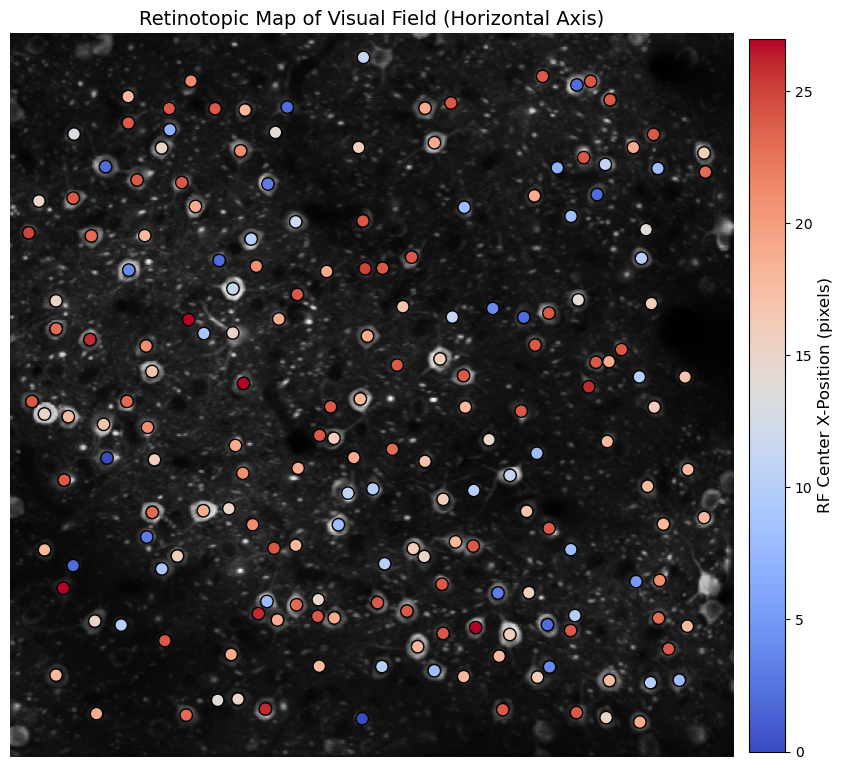

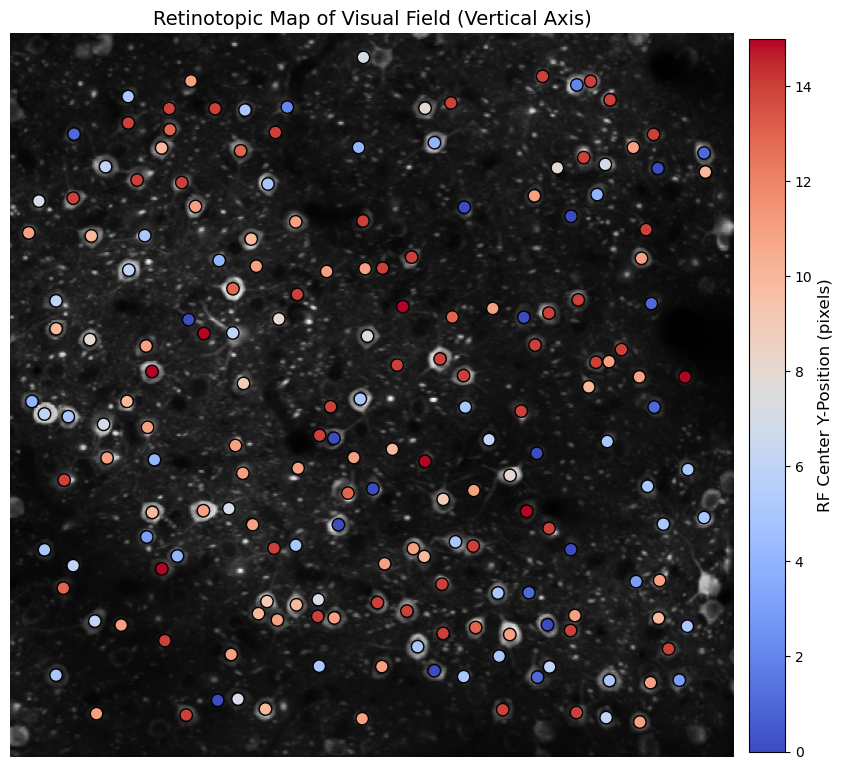

In [18]:
# Add this cell to your 04-statistical-testing.ipynb notebook

# --- Phase 4: Statistical Testing & Visualization ---
# Goal: Answer the main project question by mapping the functional
# properties (receptive fields) onto the anatomical locations (ROI masks).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils as U 
import importlib
import os

# Reload utils to ensure you're using the latest version of your functions
importlib.reload(U) 

print("Starting Phase 4: Final Analysis and Visualization...")

# --- Step 1: Load All Necessary Data ---

try:
    # ACTION: Change 'aakarsh' to your namespace if needed.
    namespace = "aakarsh" 
    
    # Load the original raw data to get ROI masks and max projection
    data = U.load_data() # Assuming the load_data function is in utils.py or defined
    roi_masks = data['roi_masks']
    max_projection_image = data['max_projection']

    # Load the output from the RF fitting notebook (03-tuning-function-fitting.ipynb)
    rf_fitting_dir = f'data/{namespace}/rf_fitting/'
    latest_rf_file = U.find_latest_file(rf_fitting_dir)
    print(f"Loading latest RF fitting data from: {latest_rf_file}")
    
    rf_data = np.load(latest_rf_file)
    all_rfs_spatial = rf_data['all_rfs_spatial']

except (FileNotFoundError, NameError) as e:
    print(f"ERROR: Could not find a necessary input file: {e}")
    print("Please ensure you have run the previous notebooks and saved their outputs correctly.")
    raise

# --- Step 2: Calculate Physical and Functional Locations ---

# Calculate the physical (x, y) coordinates for each neuron from its ROI mask
roi_centroids = U.calculate_roi_centroids(roi_masks)

# Calculate the functional (x, y) coordinates for each RF from the spatial maps
rf_centers = U.calculate_rf_centers(all_rfs_spatial)


# --- Step 3: Visualize the Retinotopic Map ---
# This is the key visualization that tests the project's hypothesis.
# We create two plots to map the horizontal (X) and vertical (Y) axes.

print("\nGenerating retinotopic maps...")

# Plot 1: Map of the horizontal (X) axis of the visual field
U.plot_retinotopic_map(
    roi_centroids=roi_centroids,
    rf_centers=rf_centers,
    background_image=max_projection_image,
    axis_to_map='x'
)

# Plot 2: Map of the vertical (Y) axis of the visual field
U.plot_retinotopic_map(
    roi_centroids=roi_centroids,
    rf_centers=rf_centers,
    background_image=max_projection_image,
    axis_to_map='y'
)


In [11]:

# --- Step 4: Save the Output of This Notebook ---
# This saves the results so you don't have to re-run this intensive step.
output_dir_rf = f'data/{namespace}/rf_fitting/'
if not os.path.exists(output_dir_rf):
    os.makedirs(output_dir_rf)

from datetime import datetime
run_date_prefix_current_time = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")

output_path = os.path.join(
    output_dir_rf,
    f"neuron_rf_{run_date_prefix_current_time}.npz",
)
np.savez_compressed(
    output_path,
    all_rfs_spatiotemporal=np.array(all_rfs_spatiotemporal),
    all_rfs_spatial=np.array(all_rfs_spatial)
)
print(f"\nSuccessfully saved receptive field results to: {output_path}")


Successfully saved receptive field results to: data/aakarsh/rf_fitting/neuron_rf_2025_07_16_20_47_22.npz
